# Example 1: running GLMsingle on an example session from the Natural Scenes Dataset; comparing voxel reliability across versions

In [1]:
import numpy as np
import os
from os.path import join, exists
import sys
import scipy
import scipy.io as sio
import matplotlib.pyplot as plt
import nibabel as nib
import pandas as pd
import glmsingle
from glmsingle.glmsingle import GLM_single
import time
import urllib.request
import importlib
importlib.reload(glmsingle)

<module 'glmsingle' from '/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/glmsingle/__init__.py'>

# Step 1: load fMRI dataset

In [2]:
homedir = f'/lab_data/tarrlab/jacobpri/GLMsingle'

datadir = join(homedir,'examples','datasets')
os.makedirs(datadir,exist_ok=True)

datafn = join(datadir,'nsdcoreexampledataset.mat')

In [3]:
if not exists(datafn):
    
    print(f'Downloading example dataset and saving to:\n{datafn}')
    
    # NSD core experiment, subject 1, session 1, one slice of the fMRI volume. 750 trials total
    dataurl = 'https://www.dropbox.com/s/68lcqbdr00jyook/nsdcoreexampledataset.mat?dl=1'
    
    #file = urllib.urlretrieve()
    urllib.request.urlretrieve(dataurl, datafn)
    
# load it
X = sio.loadmat(datafn)

stimdur = X['stimdur'][0][0]
tr = X['tr'][0][0]


In [4]:
data = []
design = []

for r in range(len(X['data'][0])):
    data.append(X['data'][0,r])
    design.append(scipy.sparse.csr_matrix.toarray(X['design'][0,r]))

# visualize data and design matrix

In [5]:
print(f'data has {len(data)} runs')
print(f'shape of data from each run is: {data[0].shape}')
print(f'XYZ dimensionality is: {data[0].shape[:3]} (one slice only)')
print(f'n = {data[0].shape[3]} TRs per run')
print(f'type of data is: {type(data[0][0,0,0,0])}')

data has 12 runs
shape of data from each run is: (145, 186, 1, 300)
XYZ dimensionality is: (145, 186, 1) (one slice only)
n = 300 TRs per run
type of data is: <class 'numpy.float32'>


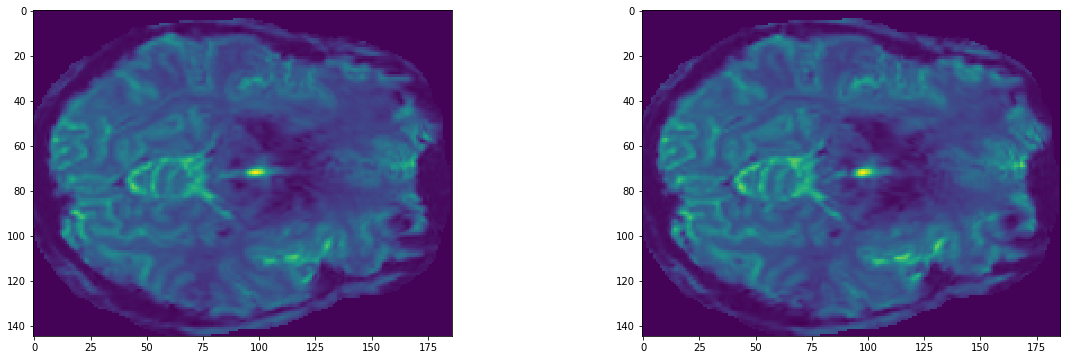

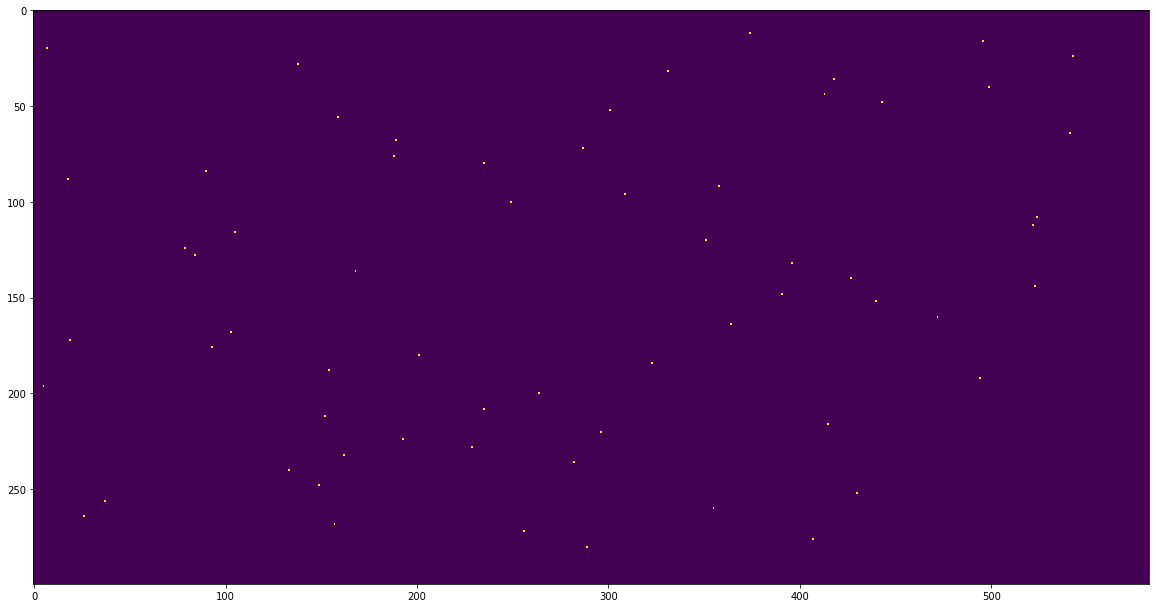

In [6]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.imshow(data[0][:,:,0,0])
plt.subplot(122)
plt.imshow(data[10][:,:,0,0])

plt.figure(figsize=(20,20))
plt.imshow(design[0])

# Step 2: Run baseline GLM (canonical HRF and no optimizations) using GLMsingle

In [7]:
outputdir = join(homedir,'examples','example1outputs_assumehrf')

opt = dict()
opt['wantlibrary'] = 0
opt['wantglmdenoise'] = 0
opt['wantfracridge'] = 0
opt['wantlss'] = 0
opt['wantfileoutputs'] = [1,1,0,0]
opt['wantmemoryoutputs'] = [1,1,0,0]

start_time = time.time()
gst = GLM_single(opt)

print(gst.params)

{'wantlibrary': 0, 'wantglmdenoise': 0, 'wantfracridge': 0, 'wantlss': 0, 'wantfileoutputs': [1, 1, 0, 0], 'wantmemoryoutputs': [1, 1, 0, 0], 'numforhrf': 50, 'hrfthresh': 0.5, 'hrffitmask': 1, 'R2thresh': 0, 'hrfmodel': 'optimise', 'n_jobs': 1, 'n_pcs': 10, 'n_boots': 100, 'extra_regressors': False, 'chunklen': 45000, 'wantparametric': 0, 'wantpercentbold': 1, 'brainthresh': [99.0, 0.1], 'brainR2': [], 'brainexclude': False, 'pcR2cutoff': [], 'pcR2cutoffmask': 1, 'pcstop': 1.05, 'fracs': array([1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 ,
       0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05]), 'wantautoscale': 1, 'seed': 1621491335.6248696, 'suppressoutput': 0, 'lambda': 0}


In [9]:
# run GLMsingle
results = gst.fit(
   design,
   data,
   stimdur,
   tr,
   outputdir=outputdir)

elapsed_time = time.time() - start_time
print(
    'elapsed time: ',
    f'{time.strftime("%H:%M:%S", time.gmtime(elapsed_time))}'
)


*** FITTING TYPE-A MODEL (ONOFF) ***

fitting model...
done.

preparing output...
done.

computing model fits...
done.

computing R^2...
done.

computing SNR...
done.


*** Saving results to /lab_data/tarrlab/jacobpri/GLMsingle/examples/example1outputs_assumehrf/TYPEA_ONOFF.npy. ***



/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/glmsingle/ols/glm_estimatemodel.py:876: RuntimeWarning: divide by zero encountered in true_divide
  con = 1/np.abs(results['meanvol']) * 100
/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/glmsingle/ols/glm_estimatemodel.py:879: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betas'])
/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/glmsingle/ols/glm_estimatemodel.py:881: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betasmd'])
/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/glmsingle/ols/glm_estimatemodel.py:883: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betasse'])
chunks:   0%|          | 0/1 [00:00<?, ?it/s]

*** Setting brain R2 threshold to 1.2939225743738558 ***

*** FITTING TYPE-B MODEL (FITHRF) ***



/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/glmsingle/ols/glm_estimatemodel.py:876: RuntimeWarning: divide by zero encountered in true_divide
  con = 1/np.abs(results['meanvol']) * 100
/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/glmsingle/ols/glm_estimatemodel.py:879: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betas'])
/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/glmsingle/ols/glm_estimatemodel.py:881: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betasmd'])
/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/glmsingle/ols/glm_estimatemodel.py:883: RuntimeWarning: invalid value encountered in multiply
  lambda x: x*con, 0, results['betasse'])
chunks: 100%|██████████| 1/1 [00:21<00:00, 21.09s/it]



*** Saving results to /lab_data/tarrlab/jacobpri/GLMsingle/examples/example1outputs_assumehrf/TYPEB_FITHRF.npy. ***

*** All model types done ***

*** return model types in results ***

elapsedtime:  00:00:40


In [ ]:
# Step 3: Visualize baseline GLM outputs

In [ ]:
# Step 3: Run GLMsingle with optimizations (library of HRFs, GLMdenoise, fractional ridge regression)

In [ ]:
# Step 4: Get indices of betas from repeated images; compare voxel split-half reliability across beta versions